# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df_test = pd.read_csv('Resources/kc_house_data_test_features.csv')
df = pd.read_csv('Resources/kc_house_data_train.csv')

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [61]:
# # sanity checks and becoming familiar
# df.head()
# df.max()
# df.isnull().values.any() #False

In [3]:
#df.info() # all int, float, date - object
#df.shape # (17290, 22)
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [3]:
#Create new column 'age' for age of house
df['age'] = 2020 - df.yr_built

#Create new column 'last_renovted' for how long ago since last renovation -- 
## EXTRA: make a new df to see only renovated homes??
df['last_ren'] = np.where(df['yr_renovated'] > 0, (2020 - df['yr_renovated']), 0)

#Create new column 'last_ren2' for how long ago since last renovation -- 
df['last_ren2'] = np.where(df['yr_renovated'] > 0, (2020 - df['yr_renovated']), (2020 - df['yr_built']))

#Create 0/1 new column 'renovated'
#df["renovated"] = df.yr_renovated.apply(lambda x: 1 if x > 0 else 0)
df['renovated'] = np.where(df['yr_renovated']>0 , 1, 0)

#Create dummy columns using 'renovted'
df = pd.get_dummies(df, columns=['renovated'])

#Create dummy variable 'basement' y/n - 6806 with basement, 10484 without
df['basement'] = np.where(df['sqft_basement']>0 , 1, 0)

#Create a new column 'neighbors_compared' with sqft_living - sqft_living15
df['neighbors_compared'] = df.sqft_living - df.sqft_living15

df.drop(['lat', 'long', 'zipcode'], axis=1)


# #Create dummy variable 'neighbors_compared_dummy' y/n - 6806 with basement, 10484 without
# df['neighbors_compared_dummy'] = np.where((df['sqft_living'] > df['sqft_living15']), 1, 0)

# #Create a new column 'lot_compared' with sqft_lot - sqft_lot15
# df['lot_compared'] = df.sqft_lot - df.sqft_lot15

# #Create dummy variable 'lot_compared_dummy' y/n 
# df['lot_compared_dummy'] = np.where((df['sqft_lot'] > df['sqft_lot15']), 1, 0)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,age,last_ren,last_ren2,renovated_0,renovated_1,basement,neighbors_compared
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,2390,7700,34,0,34,1,0,0,-320
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,2370,6283,43,0,43,1,0,1,530
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,3710,9685,23,0,23,1,0,0,60
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,4050,14226,30,0,30,1,0,0,510
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,2250,4050,16,0,16,1,0,0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,2730,10400,62,0,62,1,0,1,510
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,1350,4013,72,0,72,1,0,0,-50
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,1760,9403,67,0,67,1,0,0,-710
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,2080,108028,49,0,49,1,0,1,-180


In [5]:
# #Sanity Check
# df.sort_values('sqft_living', ascending=False)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,last_ren,last_ren2,renovated_0,renovated_1,basement,neighbors_compared
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,34,0,34,1,0,0,-320
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,43,0,43,1,0,1,530
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,23,0,23,1,0,0,60
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,30,0,30,1,0,0,510
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,16,0,16,1,0,0,300


In [10]:
# df.drop(columns=['Unnamed: 0'], inplace=True)

In [51]:
# #drop bedrooms outliers
# df = df[df.bedrooms != 33]

In [52]:
# #removing one outlier - 33 bedrooms
# df.sort_values('bedrooms', ascending=False).head(10)

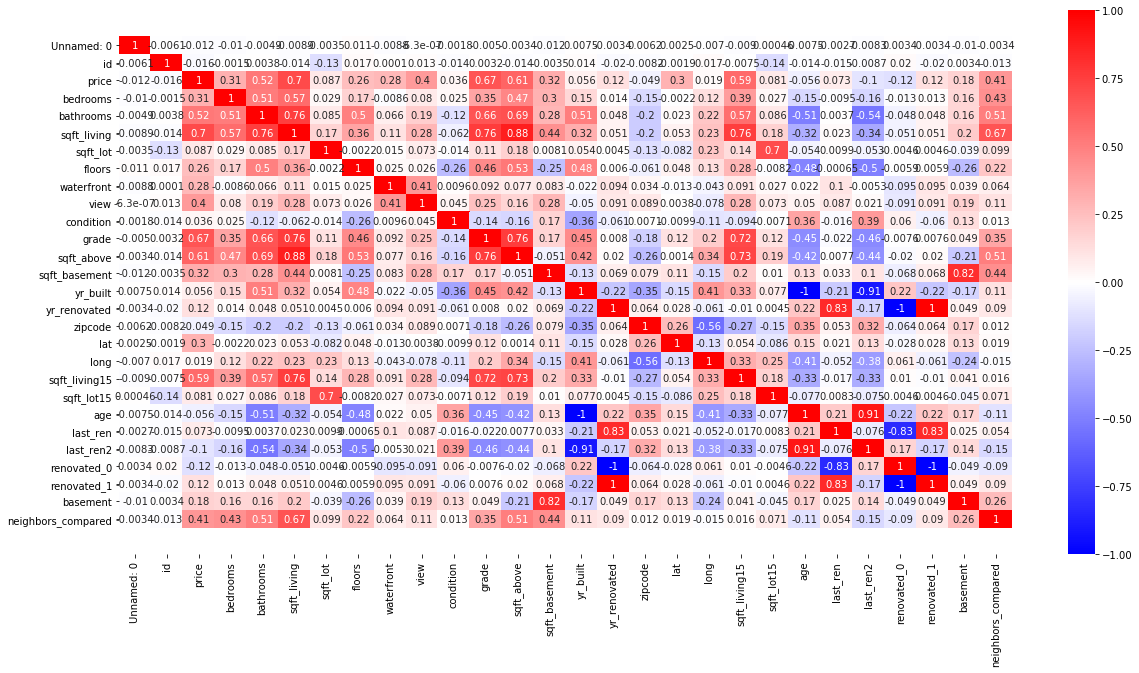

In [4]:
#create a heatmap to visualize the correlations
fig, ax = plt.subplots(figsize=(20,10)) # figsize to make larger
sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 2 # Add 0.5 to the bottom
t -= 2 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [5]:
# Calculate gross amount that is 3 times above the standard deviation
above_3std = df.price.mean()+(3*df.price.std())
above_3std

1660696.4848886705

In [6]:
df.shape

(17290, 29)

In [7]:
df2 = df[(df['price']<=1600000)]

In [8]:
df2.shape

(16944, 29)

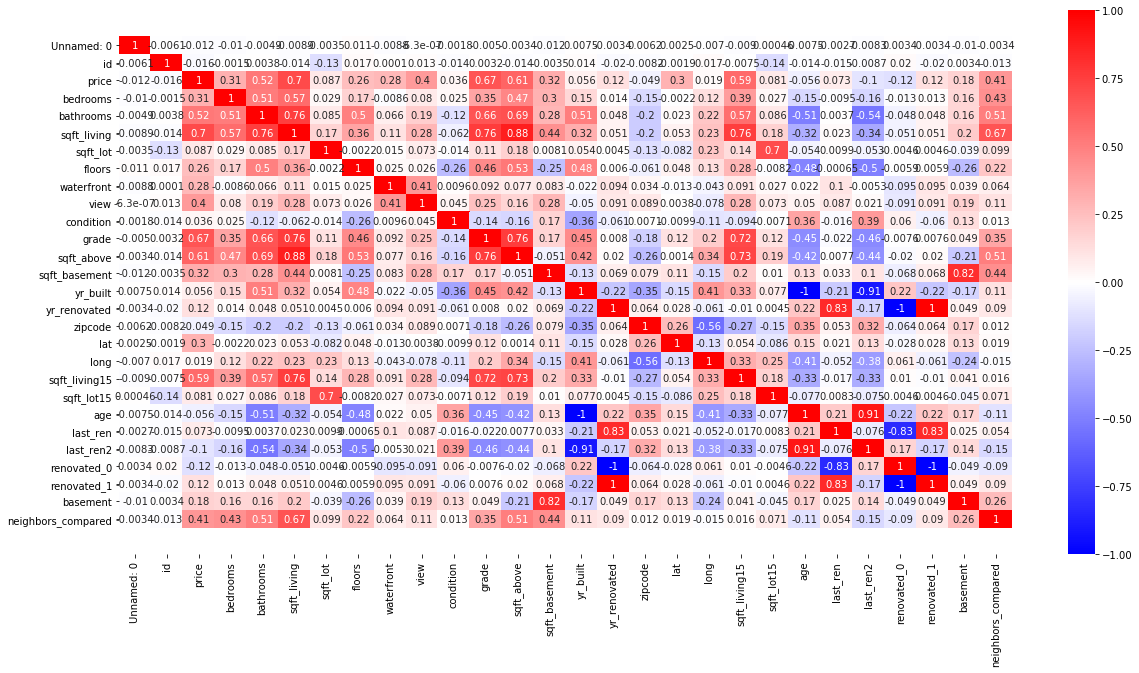

In [9]:
#create a heatmap to visualize the correlations
fig, ax = plt.subplots(figsize=(20,10)) # figsize to make larger
sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 2 # Add 0.5 to the bottom
t -= 2 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

### Statistical Test - T-Test on 'condition'

Text(0.5, 0, 'Condition')

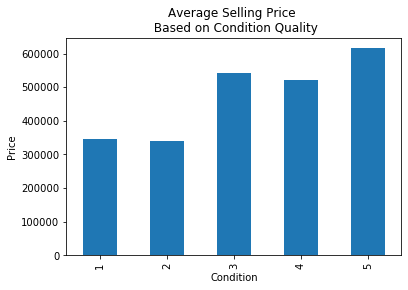

In [10]:
#Barplot Price v Condition
df.groupby('condition')['price'].mean().plot(kind='bar')
#Set labels
plt.title('Average Selling Price \n Based on Condition Quality', size=12)
plt.ylabel('Price')
plt.xlabel('Condition')

In [11]:
#Create 0/1 new column 'condition2'
df['condition2'] = np.where(df['condition']<=2, 0, 1)

In [12]:
# ## RUN ONCE
#Create dummy columns using 'condition2'
df = pd.get_dummies(df, columns=['condition2'])

In [7]:
# #Create 0/1 new column 'condition'
# ## RUN ONCE
# df['condition2'] = np.where(df['condition2']<=2, 0, 1)

In [34]:
#sanity check
#df.sort_values('condition').head(20)

In [35]:
# #sanity check
#df.describe()

In [13]:
# Sample Mean
df.groupby('condition2_0')['price'].mean()

condition2_0
0    542644.567467
1    340572.325153
Name: price, dtype: float64

In [11]:
#df['condition2_0'].value_counts(dropna=False)

In [14]:
# Sample Mean
df.groupby('condition2_0')['price'].std()

condition2_0
0    373665.252599
1    268672.291168
Name: price, dtype: float64

In [15]:
## t-test on 'condition'

mu = df.price.mean() 
c_x_bar = 542644.567467
c_sigma = 373665.252599
c_n = 17127
c_df = c_n-1

# Difference in sample mean 
diff = c_x_bar - mu


# Print the findings
print ('The difference between sample and population means is:', diff)

The difference between sample and population means is: 1905.0188261670992


In [16]:
# We can test 'condition' feature in model (according to t-score)
t = (c_x_bar -  mu)/(c_sigma/np.sqrt(c_n))
t

0.6672017955654185

### Statistical Test - T-Test on 'renovated'

In [17]:
# Sample Mean
df.groupby('renovated_1')['price'].mean()

renovated_1
0    531563.548660
1    750093.906336
Name: price, dtype: float64

In [18]:
# Sample Standard Deviation
df.groupby('renovated_1')['price'].std()

renovated_1
0    355726.757469
1    621893.769068
Name: price, dtype: float64

In [19]:
# Population Mean
df.price.mean()

540739.5486408329

In [20]:
## t-test on 'renovated'

mu = df.price.mean() 
r_x_bar = 750093.906336
r_sigma = 621893.769068
r_n = 726
r_df = r_n-1

# Difference in sample mean 
diff = r_x_bar - mu


# Print the findings
print ('The difference between sample and population means is:', diff)

The difference between sample and population means is: 209354.35769516707


In [21]:
#ttest score is too high, cannot use 'renovated' column - best to drop from model
t = (r_x_bar -  mu)/(r_sigma/np.sqrt(r_n))
t

9.070560198806552

### Statistical Test - T-Test on 'waterfront'

In [6]:
# # #Create 0/1 new column 'waterfront2'
# df['waterfront2'] = np.where(df['waterfront']<=2, 0, 1)

In [22]:
# ## RUN ONCE
#Create dummy columns using 'waterfront'
df = pd.get_dummies(df, columns=['waterfront'])

In [7]:
# #Create 0/1 new column 'condition'
# ## RUN ONCE
# df['condition2'] = np.where(df['condition2']<=2, 0, 1)

In [23]:
#sanity check
df.sort_values('waterfront_0')

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,last_ren,last_ren2,renovated_0,renovated_1,basement,neighbors_compared,condition2_0,condition2_1,waterfront_0,waterfront_1
8077,8077,625059036,20140813T000000,2700000.0,5,4.00,4230,27295,2.0,4,3,8,3230,1000,1949,1985,98033,47.6803,-122.214,2660,27295,71,35,35,0,1,1,1570,0,1,0,1
11756,11756,7203600040,20140725T000000,625000.0,3,1.50,1990,5978,1.5,4,4,7,1990,0,1926,0,98198,47.3449,-122.329,2100,6221,94,0,94,1,0,0,-110,0,1,0,1
5859,5859,1724069062,20140714T000000,1365000.0,2,3.25,2700,3444,3.0,3,3,9,2700,0,1990,0,98075,47.5684,-122.060,2710,3444,30,0,30,1,0,0,-10,0,1,0,1
494,494,3761700053,20150105T000000,2150000.0,3,2.75,3470,9610,3.0,4,3,11,3470,0,1989,2000,98034,47.7205,-122.260,4130,11875,31,20,20,0,1,0,-660,0,1,0,1
4530,4530,825059178,20140923T000000,2574000.0,4,3.75,4475,20424,2.0,4,3,12,2659,1816,1999,0,98033,47.6646,-122.208,4340,5250,21,0,21,1,0,1,135,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,5795,921049315,20140813T000000,199000.0,3,1.75,1320,17390,1.0,0,4,7,1320,0,1956,0,98003,47.3257,-122.296,1550,19265,64,0,64,1,0,0,-230,0,1,1,0
5796,5796,6815100370,20141030T000000,845000.0,4,3.00,2390,4000,1.5,0,5,8,1460,930,1931,0,98103,47.6857,-122.331,1670,4000,89,0,89,1,0,1,720,0,1,1,0
5797,5797,1526059051,20140828T000000,995000.0,2,2.00,1600,64468,1.0,0,3,7,1600,0,1950,0,98072,47.7344,-122.143,1950,64468,70,0,70,1,0,0,-350,0,1,1,0
5783,5783,2473420170,20140924T000000,320000.0,4,2.75,2110,13260,1.0,0,4,7,1290,820,1979,0,98058,47.4513,-122.160,1980,11016,41,0,41,1,0,1,130,0,1,1,0


In [35]:
# #sanity check
#df.describe()
#df['waterfront_0'].value_counts(dropna=False)

In [24]:
#shot float values
pd.options.display.float_format = '{:.5f}'.format
# Sample Mean
df.groupby('waterfront_0')['price'].mean()

waterfront_0
0   1688486.17391
1    531505.11334
Name: price, dtype: float64

In [25]:
# Sample Mean
df.groupby('waterfront_0')['price'].std()

waterfront_0
0   1141363.28891
1    345539.95404
Name: price, dtype: float64

In [26]:
## t-test on 'condition'

mu = df.price.mean() 
w_x_bar = 1688486.17391
w_sigma = 1141363.28891
w_n = 138
w_df = w_n-1

# Difference in sample mean 
diff = w_x_bar - mu


# Print the findings
print ('The difference between sample and population means is:', diff)

The difference between sample and population means is: 1147746.6252691671


In [27]:
# We cannot test 'waterfront' feature in model
t = (w_x_bar -  mu)/(w_sigma/np.sqrt(w_n))
t

11.81303982242724

# Investigating strong correlations

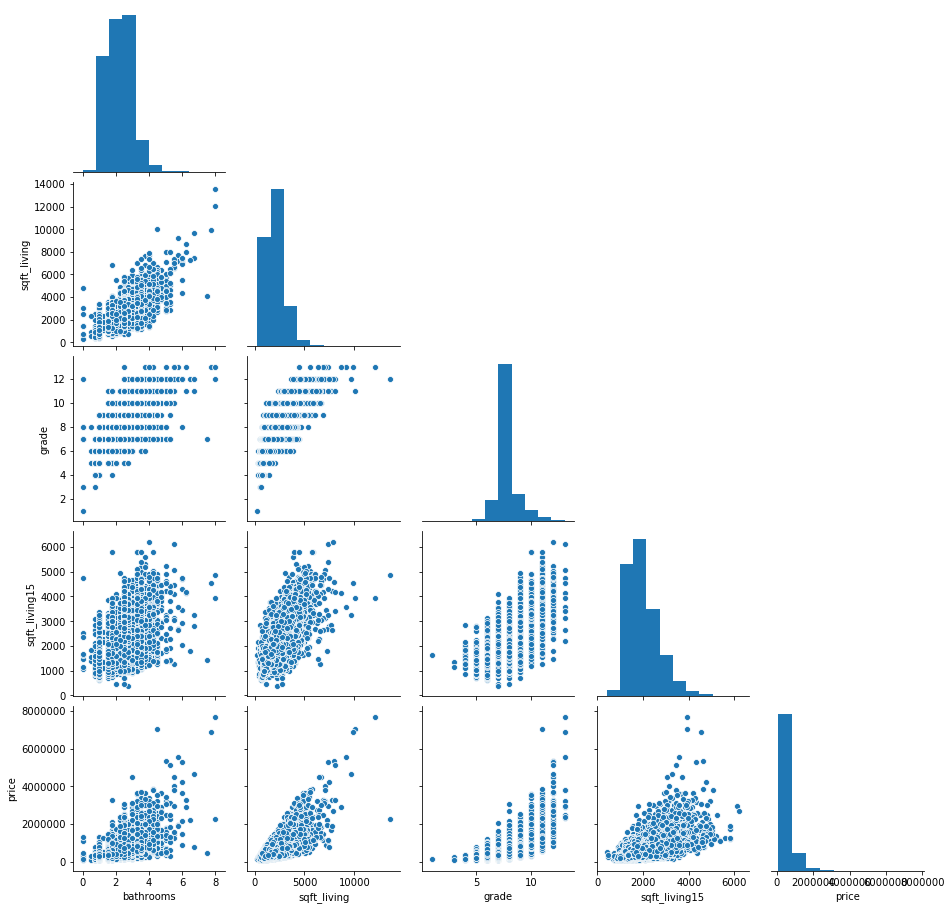

In [27]:
# #sns.pairplot(df)
# import matplotlib as plt

#Investigating strong correlations
sns.pairplot(df[['bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'price']], corner=True)


### Number of Bathrooms

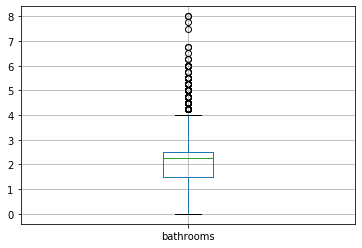

In [28]:
df.boxplot(['bathrooms'])

Text(0.5, 0, 'Bathrooms')

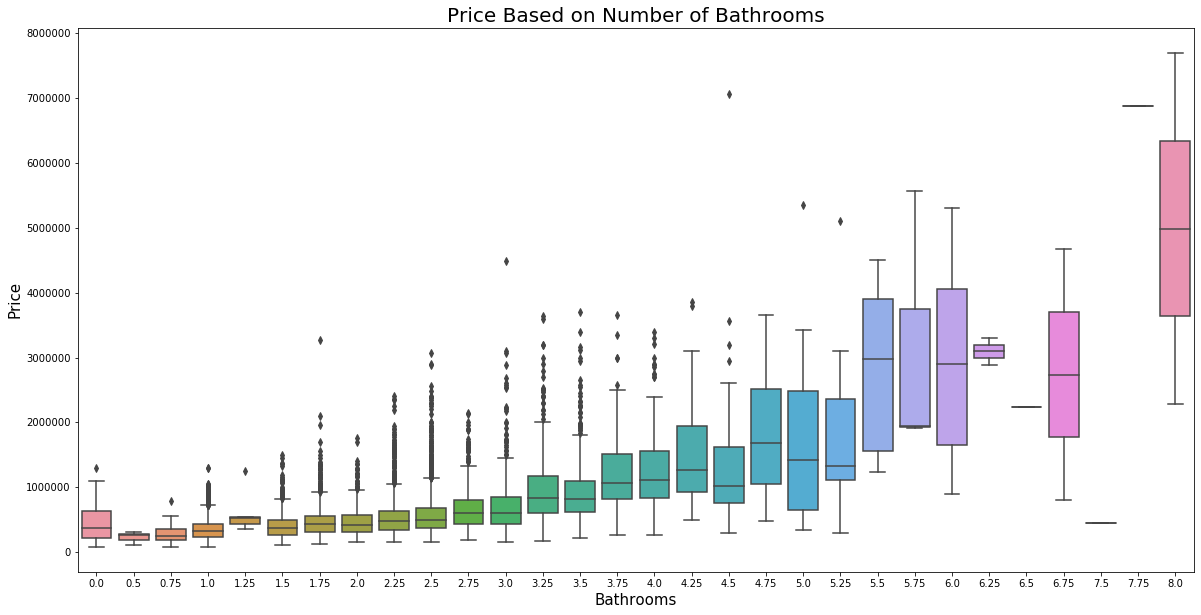

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot( x=df["bathrooms"], y=df["price"] )
#sns.plt.show()

plt.title('Price Based on Number of Bathrooms', size=20)
plt.ylabel('Price', size=15)
plt.xlabel('Bathrooms', size=15)


In [29]:
# plt.figure(figsize=(25,10))
# ax = sns.boxplot(x=df['bathrooms'], y=df['price'], data=df)
 
# # Calculate number of obs per group & median to position labels
# medians = df.groupby(['bathrooms'])['price'].median().values
# nobs = df['bathrooms'].value_counts().values
# nobs = [str(x) for x in nobs.tolist()]
# nobs = ["n: " + i for i in nobs]
 
# # Add it to the plot
# pos = range(len(nobs))
# for tick,label in zip(pos,ax.get_xticklabels()):
#     ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
# horizontalalignment='center', size='small', color='w', weight='semibold')
    
# plt.title('Price Based on Number of Bathrooms', size=20)
# plt.ylabel('Price', size=15)
# plt.xlabel('Bathrooms', size=15)


### Compare to Neighbors Living Space Square Footage

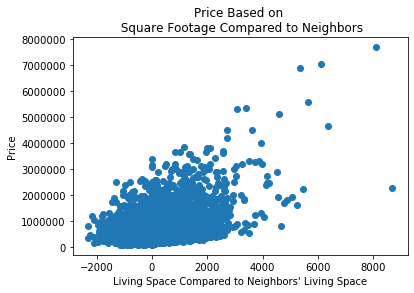

In [30]:
fig, ax = plt.subplots()

ax.set_title('Price Based on \n Square Footage Compared to Neighbors')
ax.set_ylabel('Price')
ax.set_xlabel('Living Space Compared to Neighbors\' Living Space' )

y1 = df.price
x1 = df.neighbors_compared

plt.scatter(x1,y1);

In [28]:
#Create dummy variable 'neighbors_compared_dummy' y/n - 6806 with basement, 10484 without
df['neighbors_compared_dummy'] = np.where((df['sqft_living'] > df['sqft_living15']), 1, 0)

In [29]:
#Create dummy columns using 'neighbors_compared'
df2 = pd.get_dummies(df, columns=['neighbors_compared_dummy'])

In [33]:
# #sanity check
#df.describe()
df2['neighbors_compared_dummy_1'].value_counts(dropna=False)

0    9443
1    7847
Name: neighbors_compared_dummy_1, dtype: int64

In [34]:
# Sample Mean
df2.groupby('neighbors_compared_dummy_1')['price'].mean()

neighbors_compared_dummy_1
0   464836.50683
1   632080.49726
Name: price, dtype: float64

In [35]:
# Sample Standard Deviation
df2.groupby('neighbors_compared_dummy_1')['price'].std()

neighbors_compared_dummy_1
0   260064.32963
1   458728.67850
Name: price, dtype: float64

In [36]:
## t-test on comparing neighbor sqft_living_15

mu = df.price.mean() 
n_x_bar = 632080.49726
n_sigma = 458728.67850
n_n = 7847
n_df = w_n-1

# Difference in sample mean 
diff = n_x_bar - mu


# Print the findings
print ('The difference between sample and population means is:', diff)

The difference between sample and population means is: 91340.94861916709


In [37]:
# We cannot test on feature in model
t = (n_x_bar -  mu)/(n_sigma/np.sqrt(n_n))
t

17.638491983231496

Text(0.5, 0, 'Building and Construction Rating')

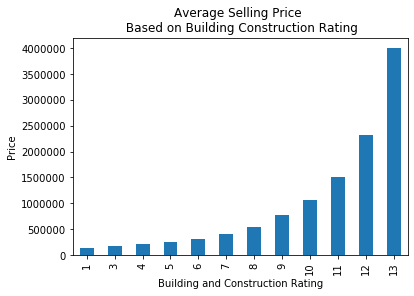

In [38]:
#Barplot Price v Grade
df.groupby('grade')['price'].mean().plot(kind='bar')

#Set labels
plt.title('Average Selling Price \n Based on Building Construction Rating', size=12)
plt.ylabel('Price')
plt.xlabel('Building and Construction Rating')

### Interior Square Footage

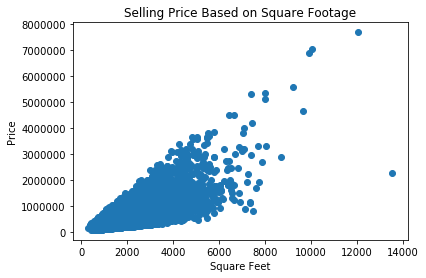

In [39]:
## EXTRA - MAKE THIS INTO A MARGINAL PLOT??
# https://python-graph-gallery.com/82-marginal-plot-with-seaborn/

fig, ax = plt.subplots()

ax.set_title('Selling Price Based on Square Footage')
ax.set_ylabel('Price')
ax.set_xlabel('Square Feet')

y1 = df.price
x1 = df.sqft_living

plt.scatter(x1,y1);

### Grade

In [40]:
# #Sanity Check
# df['grade'].value_counts(dropna=False)

Text(0.5, 0, 'Building and Construction Rating')

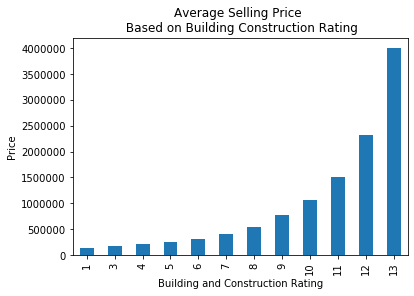

In [41]:
#Barplot Price v Grade
df.groupby('grade')['price'].mean().plot(kind='bar')

#Set labels
plt.title('Average Selling Price \n Based on Building Construction Rating', size=12)
plt.ylabel('Price')
plt.xlabel('Building and Construction Rating')

Text(0.5, 0, 'Grade')

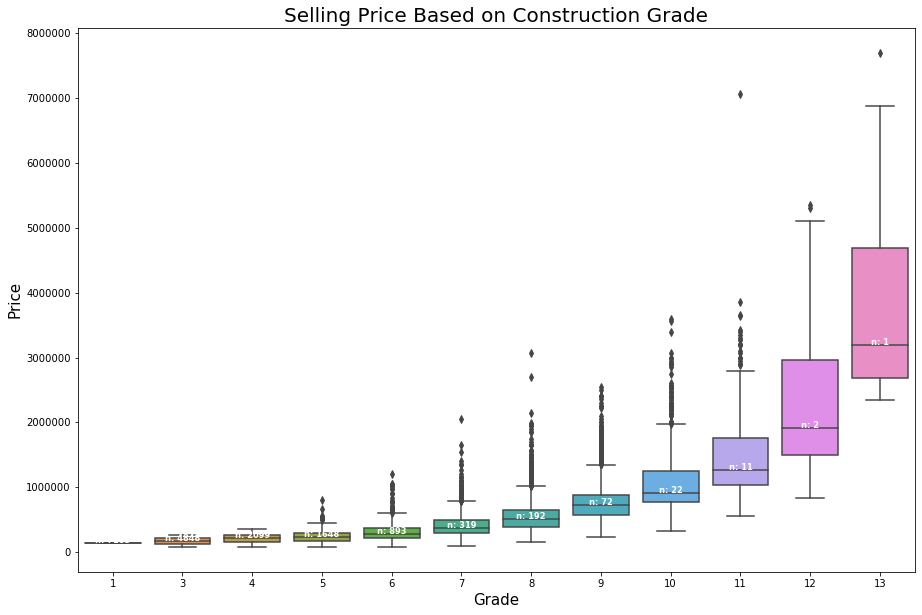

In [43]:
##EXTRA - BIN BASED ON RATINGS? 1-5, 6-9, 10-13

plt.figure(figsize=(15,10))
ax = sns.boxplot(x=df['grade'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['grade'])['price'].median().values
nobs = df['grade'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Selling Price Based on Construction Grade', size=20)
plt.ylabel('Price', size=15)
plt.xlabel('Grade', size=15)

## Investigating suprisingly weak correlations

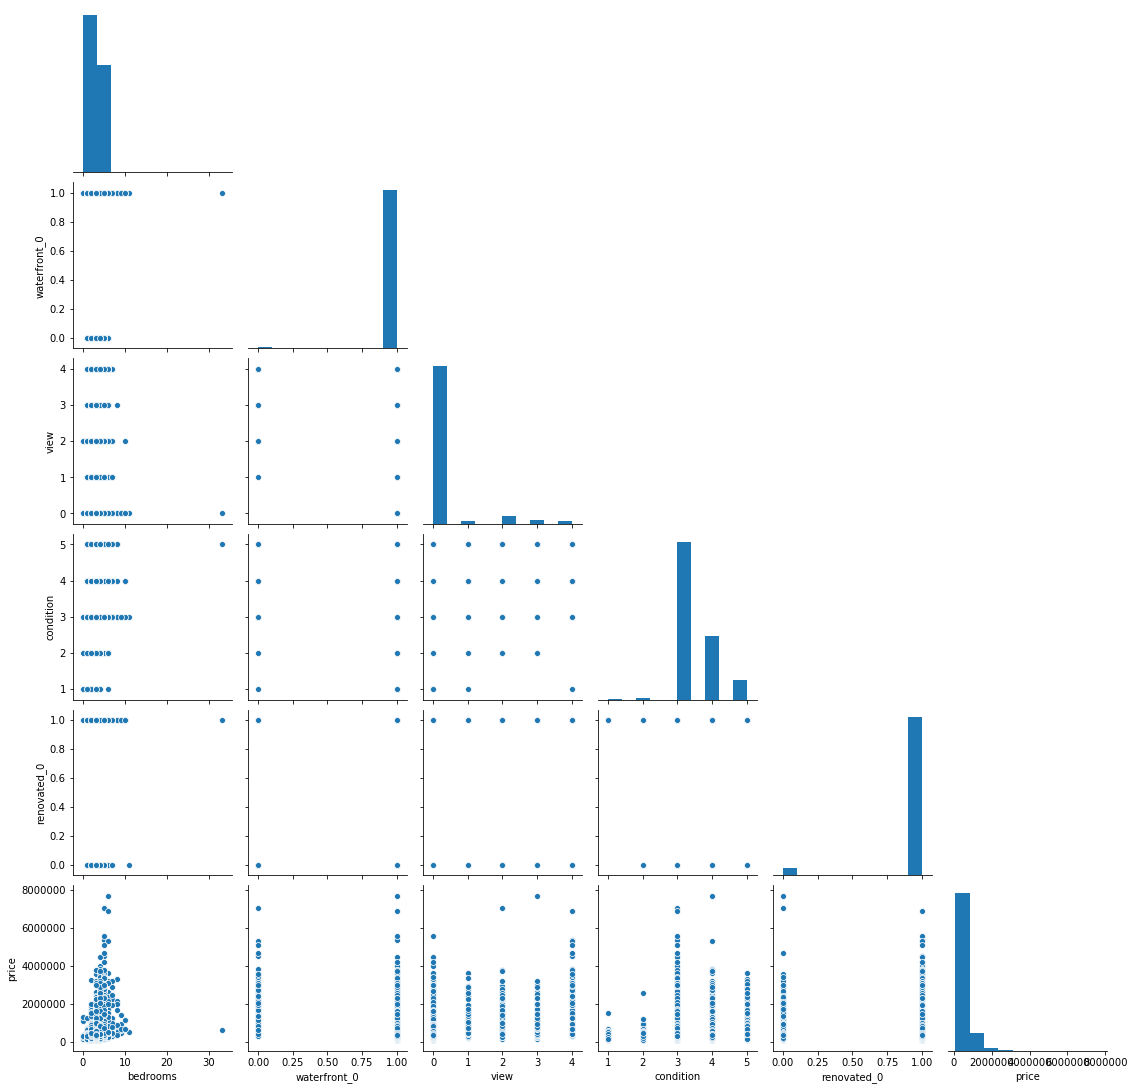

In [44]:
# I thought these would have a stronger correlation to price
sns.pairplot(df[['bedrooms', 'waterfront_0', 'view', 'condition', 'renovated_0', 'price']], corner=True)

##take care of bedrooms outliers


### Bedrooms

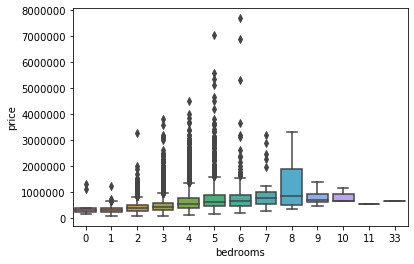

In [45]:
#df2 = pd.DataFrame(data = df, columns = ['bedrooms','waterfront','view','condition'])
sns.boxplot(x=df.bedrooms, y=df.price, data=pd.melt(df2))

plt.show()


# df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['A','B','C','D'])

# sns.boxplot(x="variable", y="value", data=pd.melt(df))

# plt.show()

In [30]:
#drop 33 bedrooms outlier
df = df[df.bedrooms != 33]

In [31]:
# Correlation - still not strong enough indication of price
df[['bedrooms','price']].corr()

,bedrooms,price
bedrooms,1.00000,0.31378
price,0.31378,1.00000


### Waterfront

Text(0.5, 0, 'Waterfront Property')

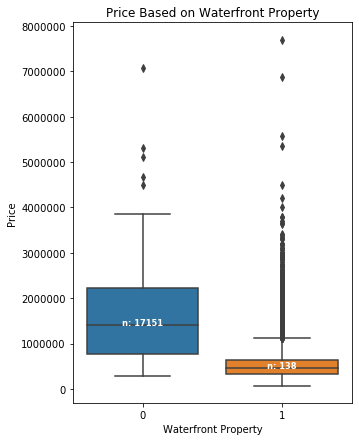

In [48]:
## Boxplot of Waterfront v. Price
plt.figure(figsize=(5,7))
ax = sns.boxplot(x=df['waterfront_0'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['waterfront_0'])['price'].median().values
nobs = df['waterfront_0'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Price Based on Waterfront Property')
plt.ylabel('Price')
plt.xlabel('Waterfront Property')

## EXTRA - EDIT TICK MARKS TO 'YES' AND 'NO'

In [49]:
# Correlation
df[['waterfront_0','price']].corr()

,waterfront_0,price
waterfront_0,1.00000,-0.27578
price,-0.27578,1.00000


### View

Text(0.5, 0, 'View Rating')

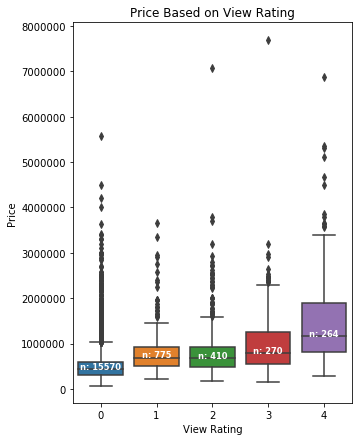

In [50]:
## Boxplot of View v. Price
plt.figure(figsize=(5,7))
ax = sns.boxplot(x=df['view'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['view'])['price'].median().values
nobs = df['view'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Price Based on View Rating')
plt.ylabel('Price')
plt.xlabel('View Rating')

Text(0.5, 0, 'Condition Quality')

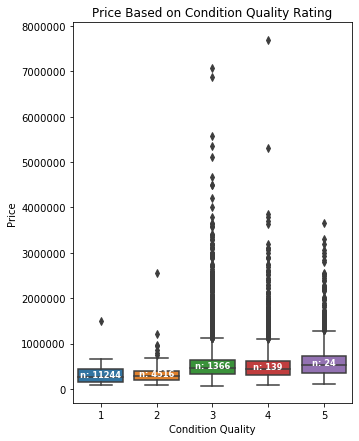

In [51]:
## Boxplot of Condition v. Price
plt.figure(figsize=(5,7))
ax = sns.boxplot(x=df['condition'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['condition'])['price'].median().values
nobs = df['condition'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Price Based on Condition Quality Rating')
plt.ylabel('Price')
plt.xlabel('Condition Quality')

### Renovation

Text(0.5, 0, 'Renovated')

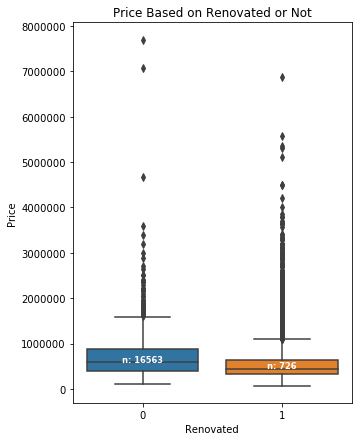

In [52]:
## Boxplot of Renovation v. Price
plt.figure(figsize=(5,7))
ax = sns.boxplot(x=df['renovated_0'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['renovated_0'])['price'].median().values
nobs = df['renovated_0'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Price Based on Renovated or Not')
plt.ylabel('Price')
plt.xlabel('Renovated')

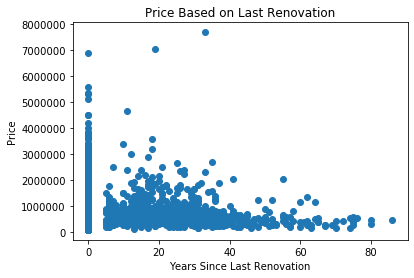

In [53]:
fig, ax = plt.subplots()

ax.set_title('Price Based on Last Renovation')
ax.set_ylabel('Price')
ax.set_xlabel('Years Since Last Renovation')

y1 = df.price
x1 = df.last_ren

plt.scatter(x1,y1);

In [54]:
df[['last_ren', 'price']].corr()

,last_ren,price
last_ren,1.00000,0.07270
price,0.07270,1.00000


In [55]:
# ## Boxplot of Renovation v. Price
# plt.figure(figsize=(5,7))
# ax = sns.boxplot(x=df['last_ren'], y=df['price'], data=df)
 
# # Calculate number of obs per group & median to position labels
# medians = df.groupby(['last_ren'])['price'].median().values
# nobs = df['last_ren'].value_counts().values
# nobs = [str(x) for x in nobs.tolist()]
# nobs = ["n: " + i for i in nobs]
 
# # Add it to the plot
# pos = range(len(nobs))
# for tick,label in zip(pos,ax.get_xticklabels()):
#     ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
# horizontalalignment='center', size='small', color='w', weight='semibold')
    
# plt.title('Price Based on Last Renovation')
# plt.ylabel('Price')
# plt.xlabel('Years Since Last Renovation')

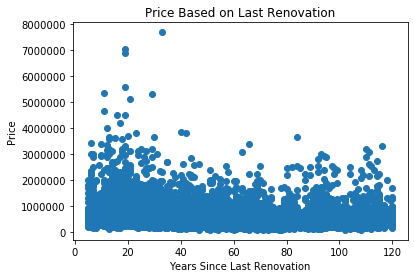

In [56]:
#This plot takes in year built as "last renovation"
fig, ax = plt.subplots()
plt.figsize=(40,40)

ax.set_title('Price Based on Last Renovation')
ax.set_ylabel('Price')
ax.set_xlabel('Years Since Last Renovation')

y1 = df.price
x1 = df.last_ren2

plt.scatter(x1,y1);

In [57]:
df[['last_ren2','price']].corr()

,last_ren2,price
last_ren2,1.00000,-0.10483
price,-0.10483,1.00000


In [25]:
# # #sns.pairplot(df)
# # import matplotlib as plt
# sns.pairplot(df[['price', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_living15', 'sqft_total_living']])


## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [100]:
# # We see that some homes have zero bathrooms. 
#df['bathrooms'].value_counts()

In [32]:
# Since zero bathrooms is highly unlikely, let's change '0' values to median, so as not to effect the mean
bathroom_median = df.bathrooms.median()
df.loc[df.bathrooms == 0, 'bathrooms'] = np.nan
df.fillna(bathroom_median,inplace=True)

##EXTRA -
#Changing .5 and .75 values to mean 1 bathroom
#If more than 5 bathrooms, change to 5?

##Starter Code:
# bins = [0, 1, 5, 10, 25, 50, 100]
# labels = [1,2,3,4,5,6]
# df['binned'] = pd.cut(df['percentage'], bins=bins, labels=labels)
# print (df)


In [87]:
# #Sanity check
#df['bathrooms'].value_counts()

In [107]:
#checking for outliers in data
#df.boxplot(['bathrooms'])

In [90]:
#sanity check
#df.sort_values('bedrooms', ascending=False)

In [75]:
# plt.figure(figsize=(25,10))
# ax = sns.boxplot(x=df['bedrooms'], y=df['price'], data=df)
 
# # Calculate number of obs per group & median to position labels
# medians = df.groupby(['bedrooms'])['price'].median().values
# nobs = df['bedrooms'].value_counts().values
# nobs = [str(x) for x in nobs.tolist()]
# nobs = ["n: " + i for i in nobs]
 
# # Add it to the plot
# pos = range(len(nobs))
# for tick,label in zip(pos,ax.get_xticklabels()):
#     ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
# horizontalalignment='center', size='small', color='w', weight='semibold')
    
# plt.title('Price Based on Number of Bedrooms', size=20)
# plt.ylabel('Price', size=15)
# plt.xlabel('Bedrooms', size=15)


In [77]:
# fig, ax = plt.subplots()

# #Set labels
# ax.set_title('Selling Price Based on Number of Bedrooms')
# ax.set_ylabel('Price')
# ax.set_xlabel('Bedrooms')

# y1 = df.price
# x1 = df.bedrooms

# plt.scatter(x1,y1);

In [102]:
# ## EXTRA - HISTOGRAM OF BEDROOMS V PRICE
# plt.title('TITLE')
# plt.xlabel('Number of Bedrooms')
# plt.ylabel('Price')

# plt.hist(x,y)
# plt.show()

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [ ]:
# new column for dummy values?

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#your code here
# bin quarterly sales
# bin sq foot

##Starter code:
# bins = [0, 1, 5, 10, 25, 50, 100]
# labels = [1,2,3,4,5,6]
# df['binned'] = pd.cut(df['percentage'], bins=bins, labels=labels)
# print (df)

In [ ]:
# scale view (0-1)
# scale condition (1-5)
# scale grade (1-13)

In [ ]:
#EXTRA: how to find homes sold more than once in last 10 years
#look at homes with same lat/lon (sold twice within 10 years?)
#sort values according to lat/lon?
#look at lat/lon of the same values?

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

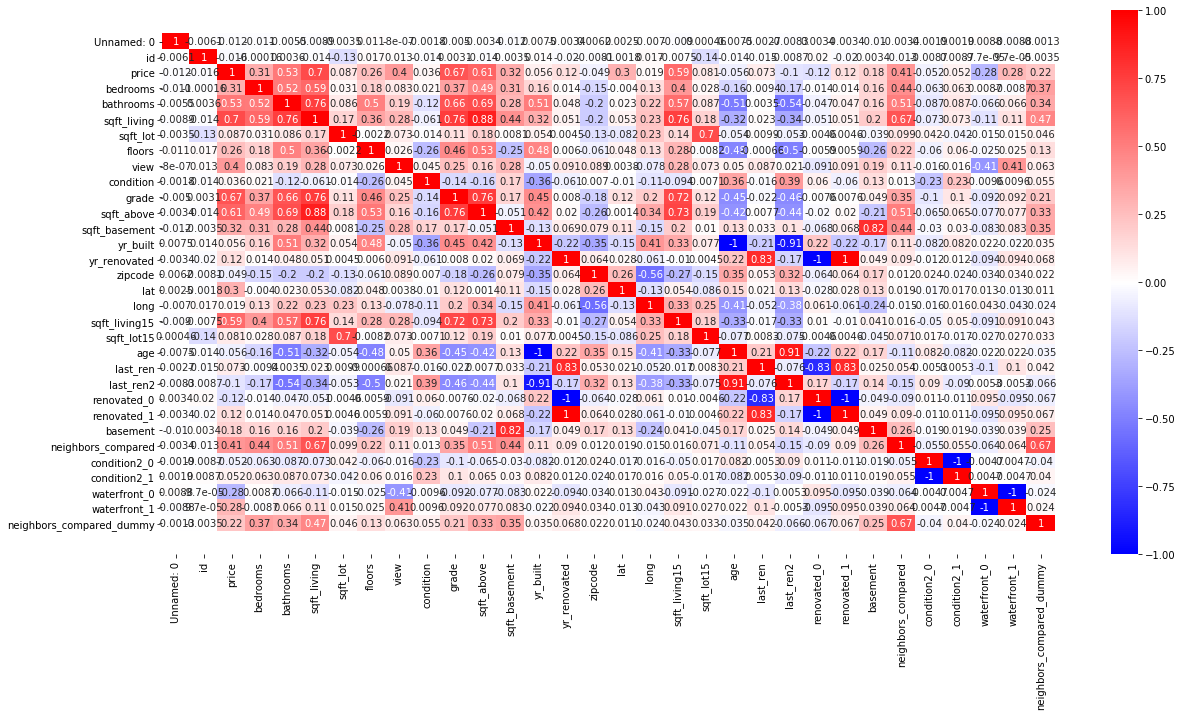

In [33]:
#create a heatmap to visualize the correlations
fig, ax = plt.subplots(figsize=(20,10)) # figsize to make larger
sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 2 # Add 0.5 to the bottom
t -= 2 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
lr_model = ols(formula='price~ bedrooms + bathrooms + sqft_living + floors + view + grade + sqft_above + + sqft_basement + lat + sqft_living15 + renovated_1 + basement + neighbors_compared + condition2_1 + waterfront_1', data=df).fit()

lr_model.summary()

In [34]:
from statsmodels.formula.api import ols

lr_model = ols(formula='price~bathrooms + sqft_living + view + grade + sqft_above +sqft_living15 + neighbors_compared_dummy + condition2_1 +bedrooms + lat + waterfront_1', data=df).fit()

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     3056.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        06:08:35   Log-Likelihood:            -2.3701e+05
No. Observations:               17289   AIC:                         4.741e+05
Df Residuals:                   17277   BIC:                         4.741e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -3.199e+07   5.79e+05    -55.294      0.000   -3.31e+07   -3.09e+07
bathrooms                -1.461e+04   3435.459     -4.252      0.000   -2.13e+04   -7875.239
sqft_living                255.4932      5.534     46.168      0.000     244.646     266.340
view                      6.475e+04   2510.800     25.789      0.000    5.98e+04    6.97e+04
grade                     7.612e+04   2504.808     30.391      0.000    7.12e+04     8.1e+04
sqft_above                 -19.6786      4.549     -4.326      0.000     -28.596     -10.761
sqft_living15              -25.1029      4.558     -5.507      0.000     -34.037     -16.168
neighbors_compared_dummy -6.526e+04   4528.378    -14.410      0.000   -7.41e+04   -5.64e+04
condition2_1             -3.237e+04   1.72e+04     -1.878      0.060   -6.62e+04    1420.586
bedrooms                 -2.668e+04   2338.664    -11.406      0.000   -3.13e+04   -2.21e+04
lat                       6.658e+05   1.22e+04     54.574      0.000    6.42e+05     6.9e+05
waterfront_1              6.046e+05   2.04e+04     29.594      0.000    5.65e+05    6.45e+05
==============================================================================
Omnibus:                    14325.239   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1164297.536
Skew:                           3.487   Prob(JB):                         0.00
Kurtosis:                      42.593   Cond. No.                     1.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

In [35]:
features = ['bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_living15', 'neighbors_compared', 'condition2_1', 'bedrooms', 'lat', 'waterfront_1']
df_features = df[features]
target = df['price']

In [36]:
df_features.describe()

,bathrooms,sqft_living,view,grade,sqft_above,sqft_living15,neighbors_compared,condition2_1,bedrooms,lat,waterfront_1
count,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000
mean,2.11301,2081.49130,0.23853,7.65446,1789.34936,1988.02476,93.46654,0.99057,3.37076,47.56005,0.00798
std,0.76916,920.03845,0.77525,1.17474,829.26951,684.80415,603.30552,0.09664,0.91194,0.13841,0.08899
min,0.50000,290.00000,0.00000,1.00000,290.00000,399.00000,-2310.00000,0.00000,0.00000,47.15590,0.00000
25%,1.50000,1430.00000,0.00000,7.00000,1200.00000,1490.00000,-220.00000,1.00000,3.00000,47.47120,0.00000
50%,2.25000,1920.00000,0.00000,7.00000,1560.00000,1840.00000,0.00000,1.00000,3.00000,47.57160,0.00000
75%,2.50000,2550.00000,0.00000,8.00000,2216.00000,2360.00000,310.00000,1.00000,4.00000,47.67790,0.00000
max,8.00000,13540.00000,4.00000,13.00000,9410.00000,6210.00000,8690.00000,1.00000,11.00000,47.77760,1.00000


### 5.1) Perform a train-test split of the data.

In [37]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13831, 11) Target:  (13831,)
Training set - Features:  (3458, 11) Target:  (3458,)


In [44]:
# fit a model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 5.2) Fit your scaler to training the data and transform testing set

In [45]:
from sklearn.preprocessing import StandardScaler

#your code here 
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train)
#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)
#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [46]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 217278.57144425527


In [47]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 224997.7935137884
Training:  217278 vs. Testing:  224997


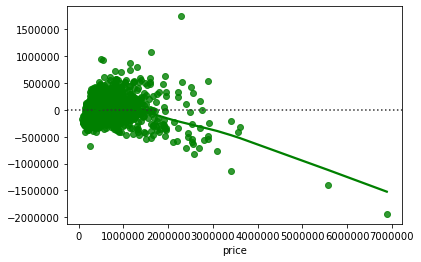

In [48]:
# Plot residuals

sns.residplot( y_test, y_test_pred,lowess=True, color="g")

In [49]:
#take the natural log of the target variable
y_log = np.log(y_train)

In [50]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)

In [51]:
#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)

In [52]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 656091.731077369


In [53]:
log_test_pred = lm_log.predict(X_test)
#exponentiate the predictions to get them on the same original scale 
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))

print('Testing Root Mean Squared Error:' , log_test_rmse)

Testing Root Mean Squared Error: 297955.6808847994


### Predict a set with log

In [54]:
y_test_pred = lm_log.predict(X_test)


#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 297955.6808847994
Training:  656091 vs. Testing:  297955


## Polynomial

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
poly= PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_features)
poly_columns = poly.get_feature_names(df_features.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()

,bathrooms,sqft_living,view,grade,sqft_above,sqft_living15,neighbors_compared,condition2_1,bedrooms,lat,waterfront_1,bathrooms^2,bathrooms sqft_living,bathrooms view,bathrooms grade,bathrooms sqft_above,bathrooms sqft_living15,bathrooms neighbors_compared,bathrooms condition2_1,bathrooms bedrooms,bathrooms lat,bathrooms waterfront_1,sqft_living^2,sqft_living view,sqft_living grade,sqft_living sqft_above,sqft_living sqft_living15,sqft_living neighbors_compared,sqft_living condition2_1,sqft_living bedrooms,sqft_living lat,sqft_living waterfront_1,view^2,view grade,view sqft_above,view sqft_living15,view neighbors_compared,view condition2_1,view bedrooms,view lat,view waterfront_1,grade^2,grade sqft_above,grade sqft_living15,grade neighbors_compared,grade condition2_1,grade bedrooms,grade lat,grade waterfront_1,sqft_above^2,sqft_above sqft_living15,sqft_above neighbors_compared,sqft_above condition2_1,sqft_above bedrooms,sqft_above lat,sqft_above waterfront_1,sqft_living15^2,sqft_living15 neighbors_compared,sqft_living15 condition2_1,sqft_living15 bedrooms,sqft_living15 lat,sqft_living15 waterfront_1,neighbors_compared^2,neighbors_compared condition2_1,neighbors_compared bedrooms,neighbors_compared lat,neighbors_compared waterfront_1,condition2_1^2,condition2_1 bedrooms,condition2_1 lat,condition2_1 waterfront_1,bedrooms^2,bedrooms lat,bedrooms waterfront_1,lat^2,lat waterfront_1,waterfront_1^2
0,2.25000,2070.00000,0.00000,8.00000,2070.00000,2390.00000,-320.00000,1.00000,4.00000,47.43880,0.00000,5.06250,4657.50000,0.00000,18.00000,4657.50000,5377.50000,-720.00000,2.25000,9.00000,106.73730,0.00000,4284900.00000,0.00000,16560.00000,4284900.00000,4947300.00000,-662400.00000,2070.00000,8280.00000,98198.31600,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,64.00000,16560.00000,19120.00000,-2560.00000,8.00000,32.00000,379.51040,0.00000,4284900.00000,4947300.00000,-662400.00000,2070.00000,8280.00000,98198.31600,0.00000,5712100.00000,-764800.00000,2390.00000,9560.00000,113378.73200,0.00000,102400.00000,-320.00000,-1280.00000,-15180.41600,-0.00000,1.00000,4.00000,47.43880,0.00000,16.00000,189.75520,0.00000,2250.43975,0.00000,0.00000
1,3.00000,2900.00000,0.00000,8.00000,1830.00000,2370.00000,530.00000,1.00000,5.00000,47.67840,0.00000,9.00000,8700.00000,0.00000,24.00000,5490.00000,7110.00000,1590.00000,3.00000,15.00000,143.03520,0.00000,8410000.00000,0.00000,23200.00000,5307000.00000,6873000.00000,1537000.00000,2900.00000,14500.00000,138267.36000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,64.00000,14640.00000,18960.00000,4240.00000,8.00000,40.00000,381.42720,0.00000,3348900.00000,4337100.00000,969900.00000,1830.00000,9150.00000,87251.47200,0.00000,5616900.00000,1256100.00000,2370.00000,11850.00000,112997.80800,0.00000,280900.00000,530.00000,2650.00000,25269.55200,0.00000,1.00000,5.00000,47.67840,0.00000,25.00000,238.39200,0.00000,2273.22983,0.00000,0.00000
2,2.50000,3770.00000,2.00000,11.00000,3770.00000,3710.00000,60.00000,1.00000,4.00000,47.56460,0.00000,6.25000,9425.00000,5.00000,27.50000,9425.00000,9275.00000,150.00000,2.50000,10.00000,118.91150,0.00000,14212900.00000,7540.00000,41470.00000,14212900.00000,13986700.00000,226200.00000,3770.00000,15080.00000,179318.54200,0.00000,4.00000,22.00000,7540.00000,7420.00000,120.00000,2.00000,8.00000,95.12920,0.00000,121.00000,41470.00000,40810.00000,660.00000,11.00000,44.00000,523.21060,0.00000,14212900.00000,13986700.00000,226200.00000,3770.00000,15080.00000,179318.54200,0.00000,13764100.00000,222600.00000,3710.00000,14840.00000,176464.66600,0.00000,3600.00000,60.00000,240.00000,2853.87600,0.00000,1.00000,4.00000,47.56460,0.00000,16.00000,190.25840,0.00000,2262.39117,0.00000,0.00000
3,3.50000,4560.00000,2.00000,12.00000,4560.00000,4050.00000,510.00000,1.00000,3.00000,47.69950,0.00000,12.25000,15960.00000,7.00000,42.00000,15960.00000,14175.00000,1785.00000,3.50000,10.50000,166.94825,0.00000,20793600.00000,9120.00000,54720.00000

### 5.4) Fit the model to the training data.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state=9,test_size=0.2)


In [58]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly.columns)

In [59]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

# print(lm_2.intercept_)
# print(lm_2.coef_)

Training Root Mean Squared Error: 185046.069294491


In [60]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 193187.71795974532
Training:  185046 vs. Testing:  193187


In [71]:
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(df_features, target, random_state=9,test_size=0.2)


In [72]:
# Create correlation matrix
corr_matrix = X_train_8.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,bathrooms,sqft_living,view,grade,sqft_above,sqft_living15,neighbors_compared,condition2_1,bedrooms,lat,waterfront_1
bathrooms,nan,0.75154,0.18271,0.65739,0.68255,0.56223,0.50061,0.08172,0.52370,0.02091,0.06342
sqft_living,nan,nan,0.28103,0.75983,0.87586,0.75434,0.65896,0.06884,0.59115,0.04767,0.10615
view,nan,nan,nan,0.24628,0.16393,0.27664,0.11111,0.01629,0.08212,0.00587,0.41605
grade,nan,nan,nan,nan,0.75652,0.71240,0.34117,0.09513,0.36506,0.11480,0.09035
sqft_above,nan,nan,nan,nan,nan,0.72844,0.49954,0.06119,0.49055,0.00486,0.07662
sqft_living15,nan,nan,nan,nan,nan,nan,0.00329,0.04628,0.39954,0.05032,0.09065
neighbors_compared,nan,nan,nan,nan,nan,nan,nan,0.05184,0.44270,0.01496,0.05783
condition2_1,nan,nan,nan,nan,nan,nan,nan,nan,0.05999,0.01203,0.00011
bedrooms,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00853,0.00864
lat,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.01271


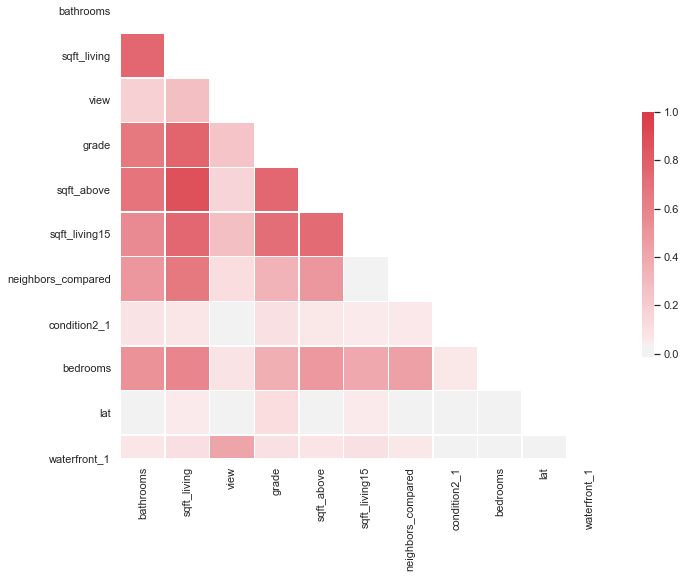

In [73]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train_8.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [74]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train_8.drop(columns=to_drop, inplace=False)
X_test_8.drop(columns=to_drop, inplace=False)


,bathrooms,sqft_living,view,grade,sqft_above,sqft_living15,neighbors_compared,condition2_1,bedrooms,lat,waterfront_1
9193,0.75000,430,0,4,430,1200,-770,0,1,47.64990,0
12171,2.00000,1610,0,7,1610,1610,0,1,3,47.33980,0
6693,1.75000,1950,0,7,1950,1950,0,1,3,47.76850,0
7069,2.00000,1540,0,7,1120,1910,-370,1,3,47.76050,0
11022,2.50000,2080,0,7,2080,2080,0,1,3,47.53000,0
...,...,...,...,...,...,...,...,...,...,...,...
4742,2.25000,1900,0,7,1400,1700,200,1,4,47.35820,0
11094,2.50000,1870,0,7,1100,1590,280,1,4,47.45210,0
5004,2.25000,2320,0,8,1160,1970,350,1,4,47.36270,0
5924,1.00000,1850,0,6,1740,1520,330,1,3,47.54460,0


In [75]:
to_drop

[]

In [85]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
#X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

In [86]:
X_test

,bathrooms,sqft_living,view,grade,sqft_above,sqft_living15,neighbors_compared,condition2_1,bedrooms,lat,waterfront_1,bathrooms^2,bathrooms sqft_living,bathrooms view,bathrooms grade,bathrooms sqft_above,bathrooms sqft_living15,bathrooms neighbors_compared,bathrooms condition2_1,bathrooms bedrooms,bathrooms lat,bathrooms waterfront_1,sqft_living^2,sqft_living view,sqft_living grade,sqft_living sqft_above,sqft_living sqft_living15,sqft_living neighbors_compared,sqft_living condition2_1,sqft_living bedrooms,sqft_living lat,sqft_living waterfront_1,view^2,view grade,view sqft_above,view sqft_living15,view neighbors_compared,view condition2_1,view bedrooms,view lat,view waterfront_1,grade^2,grade sqft_above,grade sqft_living15,grade neighbors_compared,grade condition2_1,grade bedrooms,grade lat,grade waterfront_1,sqft_above^2,sqft_above sqft_living15,sqft_above neighbors_compared,sqft_above condition2_1,sqft_above bedrooms,sqft_above lat,sqft_above waterfront_1,sqft_living15^2,sqft_living15 neighbors_compared,sqft_living15 condition2_1,sqft_living15 bedrooms,sqft_living15 lat,sqft_living15 waterfront_1,neighbors_compared^2,neighbors_compared condition2_1,neighbors_compared bedrooms,neighbors_compared lat,neighbors_compared waterfront_1,condition2_1^2,condition2_1 bedrooms,condition2_1 lat,condition2_1 waterfront_1,bedrooms^2,bedrooms lat,bedrooms waterfront_1,lat^2,lat waterfront_1,waterfront_1^2
0,-1.77937,-1.81544,-0.30569,-3.10512,-1.64958,-1.15310,-1.44420,-10.51382,-2.61738,0.65181,-0.09076,-1.21390,-1.13338,-0.27966,-1.68414,-1.11737,-1.22347,-0.51339,-2.66671,-1.60117,-1.77675,-0.08526,-0.92537,-0.26781,-1.48227,-0.93533,-1.09649,-0.34928,-2.23451,-1.44920,-1.81347,-0.08316,-0.26242,-0.29669,-0.26568,-0.28458,-0.08554,-0.30494,-0.29255,-0.30569,-0.09001,-2.28956,-1.39899,-1.39991,-0.76652,-5.53591,-2.39635,-3.09133,-0.08904,-0.90107,-1.04542,-0.37037,-2.12152,-1.42192,-1.64814,-0.08248,-0.89904,-0.75378,-2.79292,-1.58221,-1.14908,-0.08693,0.16928,-0.15791,-0.53631,-1.44609,-0.03884,-10.51382,-3.50878,-10.50884,-0.09035,-1.67868,-2.61448,-0.08634,0.65143,-0.09076,-0.09076
1,-0.14939,-0.51685,-0.30569,-0.55448,-0.21786,-0.55324,-0.15341,0.09511,-0.40798,-1.58762,-0.09076,-0.28599,-0.41928,-0.27966,-0.33917,-0.28574,-0.43474,-0.21692,-0.12881,-0.35363,-0.16143,-0.08526,-0.47679,-0.26781,-0.53893,-0.39832,-0.53952,-0.21765,-0.49395,-0.54643,-0.52483,-0.08316,-0.26242,-0.29669,-0.26568,-0.28458,-0.08554,-0.30494,-0.29255,-0.30569,-0.09001,-0.57000,-0.34760,-0.57548,-0.17919,-0.43308,-0.55892,-0.58088,-0.08904,-0.31434,-0.41672,-0.20476,-0.20074,-0.37316,-0.22681,-0.08248,-0.55145,-0.12477,-0.51419,-0.58263,-0.56387,-0.08693,-0.26962,-0.15791,-0.22285,-0.15339,-0.03884,0.09511,-0.36116,0.04602,-0.09035,-0.47659,-0.42315,-0.08634,-1.58653,-0.09076,-0.09076
2,-0.47538,-0.14268,-0.30569,-0.55448,0.19467,-0.05580,-0.15341,0.09511,-0.40798,1.50829,-0.09076,-0.53906,-0.37184,-0.27966,-0.55314,-0.23048,-0.36929,-0.21692,-0.44605,-0.53185,-0.46521,-0.08526,-0.25123,-0.26781,-0.30383,-0.12830,-0.21479,-0.21765,-0.12638,-0.33715,-0.13331,-0.08316,-0.26242,-0.29669,-0.26568,-0.28458,-0.08554,-0.30494,-0.29255,-0.30569,-0.09001,-0.57000,-0.08558,-0.27221,-0.17919,-0.43308,-0.55892,-0.52736,-0.08904,-0.01932,-0.05019,-0.20476,0.20489,-0.13004,0.20502,-0.08248,-0.18626,-0.12477,-0.03297,-0.30176,-0.04338,-0.08693,-0.26962,-0.15791,-0.22285,-0.15339,-0.03884,0.09511,-0.36116,0.14160,-0.09035,-0.47659,-0.39329,-0.08634,1.51122,-0.09076,-0.09076
3,-0.14939,-0.59389,-0.30569,-0.55448,-0.81239,-0.11432,-0.77366,0.09511,-0.40798,1.45052,-0.09076,-0.28599,-0.45378,-0.27966,-0.33917,-0.56701,-0.23075,-0.59682,-0.12881,-0.35363,-0.13837,-0.08526,-0.51788,-0.26781,-0.58733,-0.59180,-0.44581,-0.44417,-0.56963,-0.58952,-0.58648,-0.08316,-0.26242,-0.29669,-0.26568,-0.28458,-0.08554,-0.30494,-0.29255,-0.30569,-0.09001,-0.57000,-0.72522,-0.30789,-0.67308,-0.43308,-0.55892,-0.52836,-0.08904,-0.64039,-0.55387,-0.41204,-0.78533,-0.72354,-0.80642,-0.08248,-0.2328

In [79]:
##Checking for colinearity 
to_drop

[]

In [172]:
X_train_clean= X_train.drop(columns=['bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms view',
 'bathrooms grade',
 'bathrooms sqft_above',
 'bathrooms sqft_living15',
 'bathrooms condition2_1',
 'bathrooms lat',
 'bathrooms waterfront_1',
 'sqft_living^2',
 'sqft_living view',
 'sqft_living grade',
 'sqft_living sqft_above',
 'sqft_living sqft_living15',
 'sqft_living neighbors_compared',
 'sqft_living condition2_1',
 'sqft_living bedrooms',
 'sqft_living lat',
 'sqft_living waterfront_1',
 'view^2',
 'view grade',
 'view sqft_above',
 'view sqft_living15',
 'view condition2_1',
 'view bedrooms',
 'view lat',
 'view waterfront_1',
 'grade^2',
 'grade sqft_above',
 'grade sqft_living15',
 'grade neighbors_compared',
 'grade bedrooms',
 'grade lat',
 'grade waterfront_1',
 'sqft_above^2',
 'sqft_above sqft_living15',
 'sqft_above neighbors_compared',
 'sqft_above condition2_1',
 'sqft_above bedrooms',
 'sqft_above lat',
 'sqft_above waterfront_1',
 'sqft_living15^2',
 'sqft_living15 neighbors_compared',
 'sqft_living15 condition2_1',
 'sqft_living15 lat',
 'sqft_living15 waterfront_1',
 'neighbors_compared condition2_1',
 'neighbors_compared bedrooms',
 'neighbors_compared lat',
 'condition2_1^2',
 'condition2_1 bedrooms',
 'condition2_1 lat',
 'condition2_1 waterfront_1',
 'bedrooms^2',
 'bedrooms lat',
 'bedrooms waterfront_1',
 'lat^2',
 'lat waterfront_1',
 'waterfront_1^2'])

In [177]:
X_train_clean.head()

,bathrooms,sqft_living,view,grade,sqft_above,sqft_living15,neighbors_compared,condition2_1,bedrooms,lat,waterfront_1,bathrooms neighbors_compared,bathrooms bedrooms,view neighbors_compared,grade condition2_1,sqft_living15 bedrooms,neighbors_compared^2,neighbors_compared waterfront_1,bathrooms^3,bathrooms^2 sqft_living,bathrooms^2 view,bathrooms^2 grade,bathrooms^2 sqft_above,bathrooms^2 sqft_living15,bathrooms^2 neighbors_compared,bathrooms^2 condition2_1,bathrooms^2 bedrooms,bathrooms^2 lat,bathrooms^2 waterfront_1,bathrooms sqft_living^2,bathrooms sqft_living view,bathrooms sqft_living grade,bathrooms sqft_living sqft_above,bathrooms sqft_living sqft_living15,bathrooms sqft_living neighbors_compared,bathrooms sqft_living condition2_1,bathrooms sqft_living bedrooms,bathrooms sqft_living lat,bathrooms sqft_living waterfront_1,bathrooms view^2,bathrooms view grade,bathrooms view sqft_above,bathrooms view sqft_living15,bathrooms view neighbors_compared,bathrooms view condition2_1,bathrooms view bedrooms,bathrooms view lat,bathrooms view waterfront_1,bathrooms grade^2,bathrooms grade sqft_above,...,sqft_living15 neighbors_compared^2,sqft_living15 neighbors_compared condition2_1,sqft_living15 neighbors_compared bedrooms,sqft_living15 neighbors_compared lat,sqft_living15 neighbors_compared waterfront_1,sqft_living15 condition2_1^2,sqft_living15 condition2_1 bedrooms,sqft_living15 condition2_1 lat,sqft_living15 condition2_1 waterfront_1,sqft_living15 bedrooms^2,sqft_living15 bedrooms lat,sqft_living15 bedrooms waterfront_1,sqft_living15 lat^2,sqft_living15 lat waterfront_1,sqft_living15 waterfront_1^2,neighbors_compared^3,neighbors_compared^2 condition2_1,neighbors_compared^2 bedrooms,neighbors_compared^2 lat,neighbors_compared^2 waterfront_1,neighbors_compared condition2_1^2,neighbors_compared condition2_1 bedrooms,neighbors_compared condition2_1 lat,neighbors_compared condition2_1 waterfront_1,neighbors_compared bedrooms^2,neighbors_compared bedrooms lat,neighbors_compared bedrooms waterfront_1,neighbors_compared lat^2,neighbors_compared lat waterfront_1,neighbors_compared waterfront_1^2,condition2_1^3,condition2_1^2 bedrooms,condition2_1^2 lat,condition2_1^2 waterfront_1,condition2_1 bedrooms^2,condition2_1 bedrooms lat,condition2_1 bedrooms waterfront_1,condition2_1 lat^2,condition2_1 lat waterfront_1,condition2_1 waterfront_1^2,bedrooms^3,bedrooms^2 lat,bedrooms^2 waterfront_1,bedrooms lat^2,bedrooms lat waterfront_1,bedrooms waterfront_1^2,lat^3,lat^2 waterfront_1,lat waterfront_1^2,waterfront_1^3
0,-1.45337,-0.76997,-0.30569,-1.40469,-0.49692,-0.81659,-0.23723,0.09511,0.69672,-1.26409,-0.09076,-0.24259,-0.82888,-0.08554,-1.16206,-0.33756,-0.26777,-0.03884,-0.72487,-0.59933,-0.22555,-0.95154,-0.61380,-0.80703,-0.17237,-1.08464,-0.78906,-1.09628,-0.07316,-0.45458,-0.20841,-0.75197,-0.47377,-0.64194,-0.15129,-0.86460,-0.62986,-0.87352,-0.07228,-0.23880,-0.26097,-0.20932,-0.24676,-0.07661,-0.27901,-0.25457,-0.27962,-0.08432,-1.11599,-0.72845,...,-0.17461,-0.17701,-0.21460,-0.17319,-0.03664,-0.76896,-0.32185,-0.77603,-0.08656,-0.15101,-0.34328,-0.08079,-0.83102,-0.08691,-0.08693,-0.05676,-0.26567,-0.19096,-0.26758,-0.04250,-0.24226,-0.30643,-0.24189,-0.03809,-0.29995,-0.30387,-0.03954,-0.23650,-0.03884,-0.03884,0.09511,0.68804,0.05601,-0.09035,0.58154,0.67243,-0.08592,0.01697,-0.09035,-0.09035,0.40554,0.56612,-0.07673,0.66379,-0.08632,-0.08634,-1.26413,-0.09076,-0.09076,-0.09076
1,2.45858,2.54253,-0.30569,1.14596,1.38373,-0.62639,4.59066,0.09511,1.80142,0.63809,-0.09076,5.59453,2.97314,-0.08554,1.02487,0.23520,5.65904,-0.03884,2.95037,2.93688,-0.22555,2.75294,2.25056,1.09488,4.46090,2.94511,3.28678,2.95955,-0.07316,2.45919,-0.20841,2.68367,1.96078,1.04672,3.49268,3.10925,3.35077,3.12056,-0.07228,-0.23880,-0.26097,-0.20932,-0.24676,-0.07661,-0.27901,-0.25457,-0.27962,-0.08432,2.08859,1.89527,...,2.45517,2.89235,3.17918,2.88422,-0.03664,-0.58496,0.24394,-0.58062,-0.08656,0.65960,0.23897,-0.08079,-0.61728,-0.08691,-0.08693,2.72531,5.

In [168]:
#selecting best features
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_regression at 0x7f984dac36a8>)

In [178]:
X_train.shape

(13831, 363)

In [62]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_regression at 0x7fd457b6e840>)

In [184]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
#X_train = X_train[selected_columns]
#X_test = X_test[selected_columns]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 20 but corresponding boolean dimension is 363

In [187]:
list(selected_columns)

['sqft_living^2',
 'sqft_living grade',
 'sqft_living sqft_living15',
 'bathrooms sqft_living grade',
 'bathrooms grade^2',
 'bathrooms grade sqft_living15',
 'sqft_living^2 grade',
 'sqft_living^2 condition2_1',
 'sqft_living^2 lat',
 'sqft_living grade^2',
 'sqft_living grade sqft_above',
 'sqft_living grade sqft_living15',
 'sqft_living grade condition2_1',
 'sqft_living grade bedrooms',
 'sqft_living grade lat',
 'sqft_living sqft_living15 condition2_1',
 'sqft_living sqft_living15 lat',
 'grade^3',
 'grade^2 sqft_above',
 'grade^2 sqft_living15']

### 5.5) Use the model to predict on the training set and the test set.

In [195]:
#instantiate a linear regression object
lm_kbest = PolynomialFeatures(degree=2, include_bias=False)

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])

TypeError: 'PolynomialFeatures' object is not callable

In [188]:
trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)



# poly= PolynomialFeatures(degree=2, include_bias=False)
# poly_data = poly.fit_transform(df_features)
# poly_columns = poly.get_feature_names(df_features.columns)
# df_poly = pd.DataFrame(poly_data, columns=poly_columns)
# df_poly.head()


AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

In [106]:


##Fit and Assess new Model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df_poly2, target)

#access output
print("intercept: ",lm.intercept_)
print("coefs: ", lm.coef_)
print("R^2: ", lm.score(df_poly2, target))


intercept:  -4434451648.034684
coefs:  [ 1.72824894e+06 -9.57090620e+03 -3.09144637e+06 -6.80973911e+06
  9.16296499e+03 -4.47288835e+03 -5.09816471e+03  1.50791837e+06
 -1.23788819e+06  1.87255425e+08 -2.69318281e+07  7.57706810e+03
  1.91152923e+00  1.36993004e+04  5.08405449e+03  5.23536078e+00
 -1.04407565e+01  1.23366411e+01 -5.19953444e+04 -8.19520135e+03
 -3.61587295e+04  4.74422853e+04 -1.11834881e+00 -2.20460018e+01
  3.42227954e+01  3.24606326e+00 -1.70602559e+00  1.26867912e+00
 -2.13791460e+01 -1.77234874e+01  1.99307356e+02  2.23308955e+02
  2.13301776e+03  1.05476052e+04  1.89469610e+01 -9.01315606e-01
 -2.11426837e+01  1.24134857e+04  4.55334507e+03  6.33221958e+04
 -4.39522879e+04 -1.33434953e+03 -9.57378874e+00  9.65557176e+00
  2.45481408e+01 -1.68453195e+03  1.31959547e+03  1.43346932e+05
 -1.54928341e+05 -9.20313015e-02 -3.13556684e+00 -3.07693296e+00
  1.93515600e+01  2.61792742e+01 -1.93058272e+02  8.94865610e+01
  2.79238735e+00  2.55230419e+00  1.57165134e+01 -5

In [107]:
print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: -148713411.8183684


In [108]:
y_train_pred = lm.predict(X_train)

In [109]:
#import the metrics module from sklearn


train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 4434991332.731919
Mean Squared Error: 1.9706446056300003e+19
Root Mean Squared Error: 4439194302.607175


In [110]:
price_std = target.std()

#putting in context of z-score
print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

Z-Score of Mean Absolute Error: 11879.57856571869
Z-Score of Root Mean Squared Error: 11890.836651044348


### 5.6) Evaluate the training and test predictions using RMSE.

In [114]:
df_features.columns

Index(['bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'sqft_living15', 'neighbors_compared', 'condition2_1', 'bedrooms',
       'lat', 'waterfront_1'],
      dtype='object')

In [111]:
y_pred = lm.predict(X_test)

In [112]:
print ("R^2 Score:", lm.score(X_test, y_test))

R^2 Score: -118006834.77146906


In [115]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:4431882169.397683
Mean Squared Error:1.9678447732120343e+19
Root Mean Squared Error:4436039645.012242


In [116]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 11871.25035325295
Root Mean Squared Error Z: 11882.386577541305


In [119]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  4439194302 vs. Testing:  4436039645


## EXTRA: Check the assumptions of linear regression

(array([2.900e+01, 2.138e+03, 1.213e+03, 5.500e+01, 1.600e+01, 4.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([-1014052.08557356,  -488071.83040837,    37908.42475681,
          563888.679922  ,  1089868.93508719,  1615849.19025238,
         2141829.44541757,  2667809.70058276,  3193789.95574795,
         3719770.21091314,  4245750.46607833]),
 <a list of 10 Patch objects>)

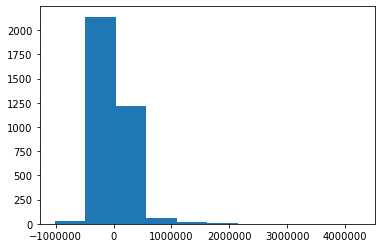

In [108]:
residuals = (y_test- y_pred)
plt.hist(residuals)
#checking for distribution

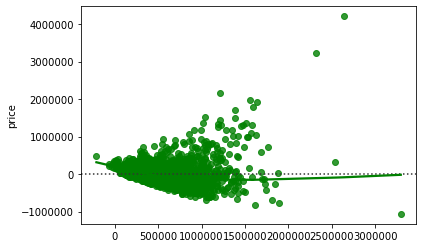

In [109]:
#check if errors are independent 
sns.residplot(y_pred, y_test, lowess=True, color="g")
#seems to be a pattern, so not independent, not homoscedastic - add more features? more data (marketing data)? non-linear 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# scaler = StandardScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(clean_df[['budget', 'cast_total_facebook_likes', 'years_old']]), 
#              columns=['budget', 'cast_total_facebook_likes', 'years_old'])


# scaler = StandardScaler()

# #fit and transform the  data
# df_poly3 = pd.DataFrame(data=scaler.fit_transform(df_poly3), columns=df_poly3.columns)

In [121]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing data
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

ValueError: Shape of passed values is (13831, 77), indices imply (13831, 11)

In [118]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

ValueError: Shape of passed values is (13831, 77), indices imply (13831, 11)

In [114]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 252603.81622601562
Training:  240582 vs. Testing:  252603


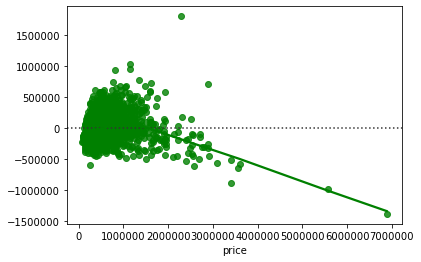

In [115]:

sns.residplot( y_test, y_test_pred,lowess=True, color="g")

In [118]:
#take the natural log of the target variable
y_log = np.log(y_train)

In [119]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)
               
#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)
               
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 656091.7603261736


In [120]:
log_test_pred = lm_log.predict(X_test)
#exponentiate the predictions to get them on the same original scale 
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))

print('Testing Root Mean Squared Error:' , log_test_rmse)

Testing Root Mean Squared Error: 291798.97976327257


In [121]:
y_test_pred = lm_log.predict(X_test)

#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 291798.97976327257
Training:  656091 vs. Testing:  291798


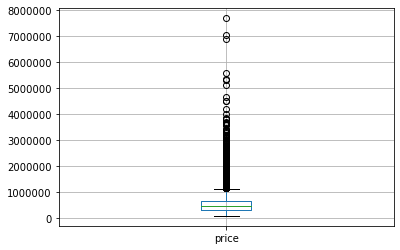

In [110]:
df.boxplot(['price'])

In [111]:
above_3std = df.price.mean()+(3*df.price.std())
above_3std

1660720.844355599

In [ ]:
df[(df['gross']<=400)&(df['gross']>100)]

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/